# Task 4 

# selecting data set and checking the missing values


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('House Price India.csv')

# Inspect the dataset
print(data.head())
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Drop rows with any missing values
data = data.dropna()



           id   Date  number of bedrooms  number of bathrooms  living area  \
0  6762810635  42491                   4                 2.50         2920   
1  6762810998  42491                   5                 2.75         2910   
2  6762812605  42491                   4                 2.50         3310   
3  6762812919  42491                   3                 2.00         2710   
4  6762813105  42491                   3                 2.50         2600   

   lot area  number of floors  waterfront present  number of views  \
0      4000               1.5                   0                0   
1      9480               1.5                   0                0   
2     42998               2.0                   0                0   
3      4500               1.5                   0                0   
4      4750               1.0                   0                0   

   condition of the house  ...  Built Year  Renovation Year  Postal Code  \
0                       5  ...    

## Analyze distributions of numerical variables

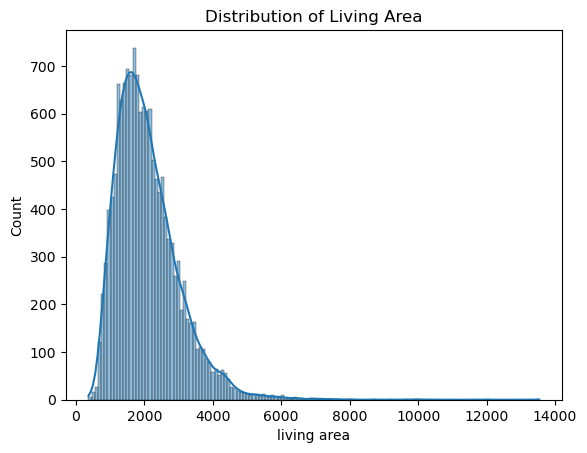

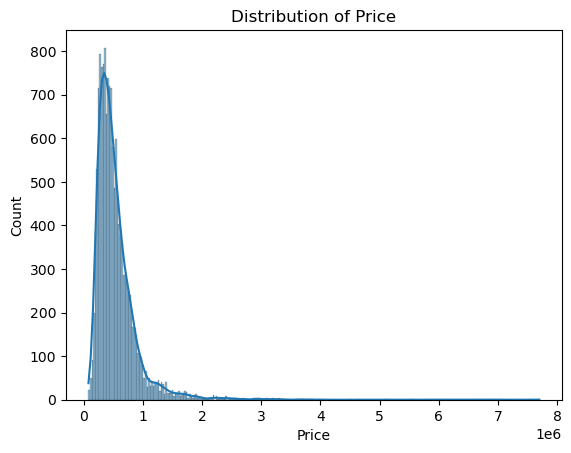

In [28]:
sns.histplot(data['living area'], kde=True)
plt.title('Distribution of Living Area')
plt.show()

sns.histplot(data['Price'], kde=True)
plt.title('Distribution of Price')
plt.show()

# Identify potential outliers

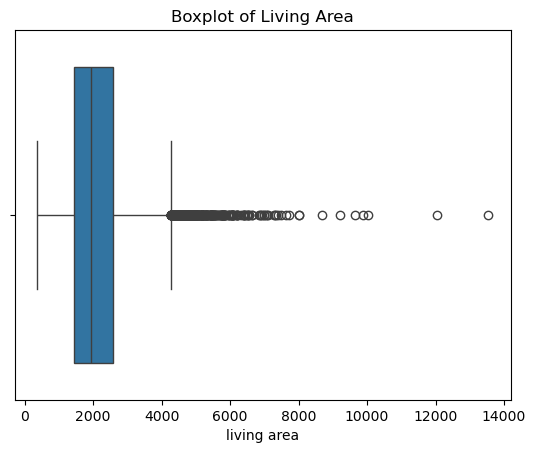

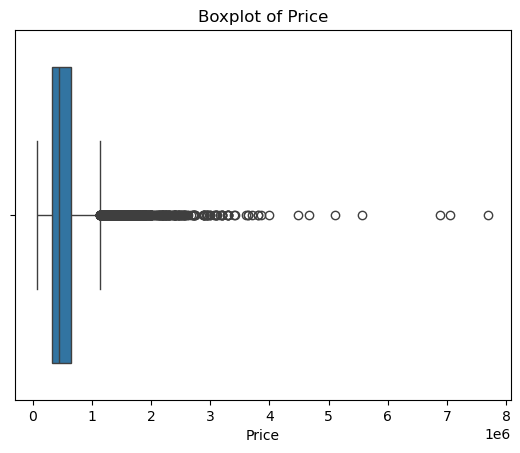

In [31]:
sns.boxplot(x=data['living area'])
plt.title('Boxplot of Living Area')
plt.show()

sns.boxplot(x=data['Price'])
plt.title('Boxplot of Price')
plt.show()

# Normalize numerical data

In [35]:
numerical_features = ['living area', 'number of bedrooms']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

# Encode categorical features
categorical_features = ['condition of the house']  # Adjust this based on your actual categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors

In [40]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing
X = data.drop('Price', axis=1)
y = data['Price']
X_preprocessed = preprocessor.fit_transform(X)
# Correlation analysis
correlation_matrix = data.corr()
print(correlation_matrix['Price'].sort_values(ascending=False))

Price                                    1.000000
living area                              0.712276
grade of the house                       0.671805
Area of the house(excluding basement)    0.615179
living_area_renov                        0.585021
number of bathrooms                      0.532031
number of views                          0.394954
Area of the basement                     0.330499
number of bedrooms                       0.308165
Lattitude                                0.297570
waterfront present                       0.263943
number of floors                         0.262649
Renovation Year                          0.133362
lot area                                 0.082117
lot_area_renov                           0.075697
Built Year                               0.050936
condition of the house                   0.040609
Longitude                                0.024807
Number of schools nearby                 0.009904
Distance from the airport                0.004074


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Make predictions

In [45]:
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Square Error (RMSE): {rmse}')

# Calculate R²
r2 = r2_score(y_test, y_pred)
print(f'R² (Coefficient of Determination): {r2}')

Root Mean Square Error (RMSE): 256046.47710369708
R² (Coefficient of Determination): 0.5570166306933111


D:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
